# **Cats vs Dog Classification**

# 1. Importing Packages

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

# 2. Defining the Image Properties

In [6]:
Image_Width = 128
Image_Height = 128
Image_Size = (Image_Width,Image_Height)
Image_Channels = 3

In [37]:
filenames = os.listdir("/content/drive/MyDrive/Deep learning DataSets/dogs-vs-cats/train")

# Initialize an empty list
categories = []

# Loop through every filename
for f_name in filenames:

    # Extract the class name from the filename.
    # If f_name is 'dog.123.jpg', .split('.') creates ['dog', '123', 'jpg']
    # [0] selects the first element: 'dog'
    category = f_name.split('.')[0]

    # Assign a numerical value

    if category == 'dog':
        categories.append(1)  # 1 represents the "Dog" class
    else:
        categories.append(0)  # 0 represents the "Not-Dog" (Cat) class

# Create a Pandas DataFrame (a structured table
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


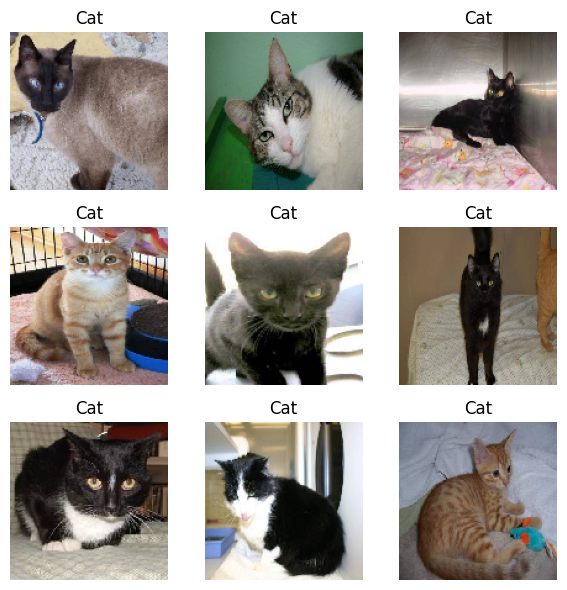

In [38]:
from tensorflow.keras.preprocessing.image import load_img

# 1. ADJUST SIZE: Change (12, 12) to (6, 6) to make the grid smaller
plt.figure(figsize=(6, 6))

# Path where your images are stored
image_folder_path = "/content/drive/MyDrive/Deep learning DataSets/dogs-vs-cats/train/"

# Loop to display 9 images in a 3x3 grid
for i in range(9):
    # Create subplots: 3 rows, 3 columns, 'i+1' is the current position
    ax = plt.subplot(3, 3, i + 1)

    # 3. Create the full file path by joining folder and filename
    image_path = os.path.join(image_folder_path, sample_filenames[i])

    # 4. Load the image and resize it to your model's input size
    img = load_img(image_path, target_size=Image_Size)

    # (1 = Dog, 0 = Cat)
    label = "Dog" if sample_categories[i] == 1 else "Cat"

    # 6. Display image and set title
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")

plt.tight_layout()
plt.show()

# 4. Creating the CNN Model

In [84]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3,3), activation = "relu",
                 input_shape = (Image_Width, Image_Height, Image_Channels)))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

# 5. Analyzing the Model

In [86]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

# 6. Callbacks and Learning rate

In [87]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 10)

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose = 1, factor = 0.5, min_lr = 0.00001)

callbacks = [earlystop, learning_rate_reduction]

# 7. Manage the DataSets

In [88]:
df["category"] = df["category"].replace({0:'cat',1:'dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
  random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

# Training and DataGeneration

In [91]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 directory="/content/drive/MyDrive/Deep learning DataSets/dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    directory="/content/drive/MyDrive/Deep learning DataSets/dogs-vs-cats/train/",
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(train_df,
                                                 directory="/content/drive/MyDrive/Deep learning DataSets/dogs-vs-cats/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 12891 validated image filenames belonging to 2 classes.
Found 3223 validated image filenames belonging to 2 classes.
Found 12891 validated image filenames belonging to 2 classes.


# 9. Model Training

In [92]:
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=total_validate//batch_size,
                    steps_per_epoch=total_train//batch_size,
                    callbacks=callbacks)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 0s 993ms/step - accuracy: 0.6759 - loss: 0.8937

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


859/859 ━━━━━━━━━━━━━━━━━━━━ 905s 1s/step - accuracy: 0.6760 - loss: 0.8934 - val_accuracy: 0.7296 - val_loss: 0.5713 - learning_rate: 0.0010
Epoch 2/10
  1/859 ━━━━━━━━━━━━━━━━━━━━ 19:23 1s/step - accuracy: 0.8000 - loss: 0.4142

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


859/859 ━━━━━━━━━━━━━━━━━━━━ 81s 93ms/step - accuracy: 0.8000 - loss: 0.4142 - val_accuracy: 0.7408 - val_loss: 0.5430 - learning_rate: 0.0010
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 945s 1s/step - accuracy: 0.7765 - loss: 0.5091 - val_accuracy: 0.8146 - val_loss: 0.4479 - learning_rate: 0.0010
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 48s 55ms/step - accuracy: 0.7333 - loss: 1.0274 - val_accuracy: 0.8156 - val_loss: 0.4432 - learning_rate: 0.0010
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 892s 1s/step - accuracy: 0.8014 - loss: 0.4622 - val_accuracy: 0.8383 - val_loss: 0.3850 - learning_rate: 0.0010
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.6667 - loss: 0.6169 - val_accuracy: 0.8389 - val_loss: 0.3823 - learning_rate: 0.0010
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 892s 1s/step - accuracy: 0.8053 - loss: 0.4363 - val_accuracy: 0.7969 - val_loss: 0.6676 - learning_rate: 0.0010
Epoch 8/10
  1/859 ━━━━━━━━━━━━━━━━━━━━ 11:10 781ms/step - accuracy: 0.7333 - loss: 0.4810

# 10. Save The Model

In [94]:
model.save("cats_vs_dogs_model_1.keras")

In [95]:
model.save("cats_vs_dogs_model_2.h5")


# 11. Test Data  Preparation

In [97]:
test_filenames = os.listdir("/content/drive/MyDrive/Deep learning DataSets/dogs-vs-cats/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [101]:
predict = model.predict(test_generator, steps=int(np.ceil(nb_samples/batch_size)))

834/834 ━━━━━━━━━━━━━━━━━━━━ 261s 312ms/step
